In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt
from astropy import cosmology
from astropy.io import fits
from astropy import table
import SAGA
from SAGAbg.utils import calc_kcor, functional_forms

In [4]:
saga = SAGA.QuickStart(local_dir='../local_data/')
#'/path/to/saga/dropbox/folder', '/path/to/saga/local/folder')

saga.database["combined_base"].remote.path = "https://drive.google.com/uc?export=download&id=1WnGUfDCZwXEUsy4zgGFR1ez3ZE5DFtsB&confirm=t&uuid=d0f82ed0-6db5-4ca0-bb8f-6c54d44a17db"

saga.database["combined_base"].download(overwrite=False)

base = saga.object_catalog.load_combined_base_catalog()
base = saga.host_catalog.construct_host_query("paper3").filter(base)

cleaner = (base['REMOVE']==0)&base['is_galaxy']&(base['g_mag']<30.)&(base['r_mag']<30.)#&(base['ZQUALITY']>=3)
clean = base[cleaner]

clean['selection'] = 0
cuts = SAGA.objects.cuts
SAGA.utils.fill_values_by_query(clean, cuts.main_targeting_cuts, {'selection':3})
SAGA.utils.fill_values_by_query(clean, cuts.paper1_targeting_cut&~cuts.main_targeting_cuts, {'selection':2})
SAGA.utils.fill_values_by_query(clean, ~cuts.main_targeting_cuts&~cuts.paper1_targeting_cut, {'selection':1})
#clean = clean.to_pandas ()

SAGA `shared_dir` set to /Users/kadofong/work/surveys/saga/notebooks
SAGA `local_dir`  set to ../local_data/


218845

In [9]:
has_halpha = np.isfinite(clean['EW_Halpha'])

(array([  4.,  11.,  31.,  63.,  77.,  61., 102.,  50.,  17.,   2.]),
 array([0.00406118, 0.00476226, 0.00546335, 0.00616444, 0.00686553,
        0.00756662, 0.0082677 , 0.00896879, 0.00966988, 0.01037097,
        0.01107205], dtype=float32),
 <BarContainer object of 10 artists>)

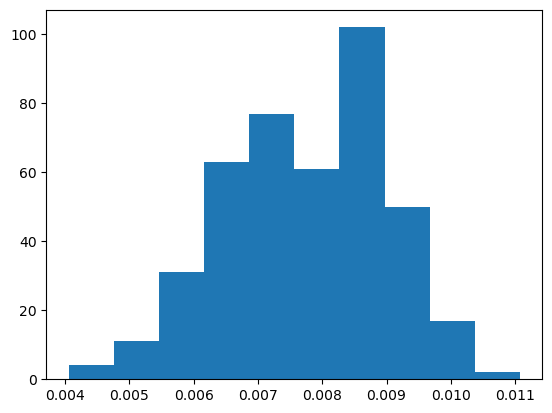

In [11]:
plt.hist(clean[has_halpha]['SPEC_Z'])